<div style="text-align:center"><img src="https://www.dropbox.com/s/roovx0dx8mpm4ep/ECE4076_banner.png?dl=1"></div>


<h1 align="center"> ECE4076/5176 - Week 8 </h1>
<h1 align="center"> Logistic Regression </h1>

You need to have the following packages to work with this notebook
- [numpy](https://anaconda.org/anaconda/numpy)
- [matplotlib](https://anaconda.org/conda-forge/matplotlib)
- [sklearn](https://scikit-learn.org/stable/install.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

np.random.seed(2023)

## The Sigmoid function

We start by remining ourselves about the Sigmoid function $\sigma:\mathbb{R} \to [0,1]$:

\begin{align}
\sigma(x) = \frac{1}{1+\exp(-x)}
\end{align}

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


Let us plot the function to understand it better

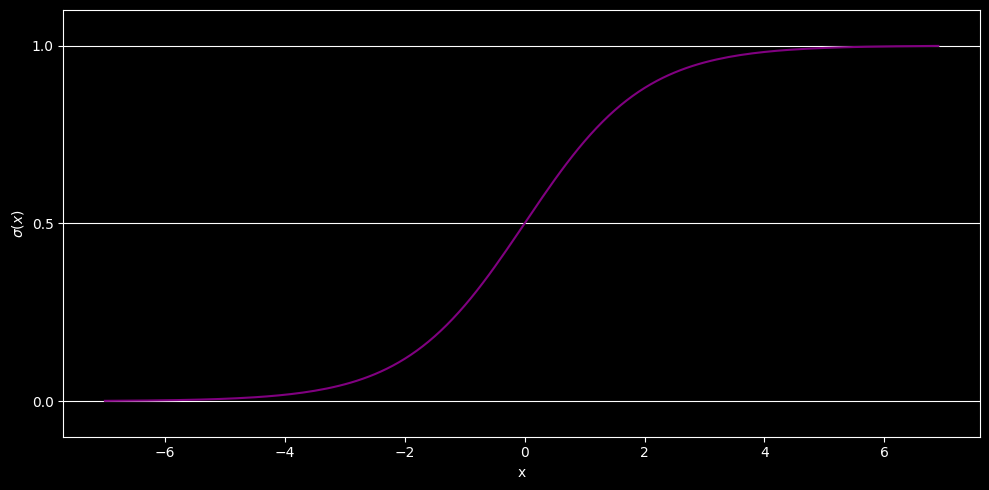

In [3]:
#plotting the Sigmoid function
x = np.arange(-7, 7, 0.1)
sigma_x = sigmoid(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, sigma_x, c='purple')
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('$\sigma (x)$')

# y axis ticks and gridline
ax.set_yticks([0.0, 0.5, 1.0])
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
## Task 1: Derivative of the Sigmoid: 

</div>



Soon we will see that deep learning requires the knowledge of gradient of functions to operate, so how about grabbing a piece of paper and deriving the form of derivative of the Sigmoid function! 



<div class="alert alert-block alert-success">

##  Logistic Loss (aka binary cross entropy)

</div>

The total loss of the logistic regression is defined as

\begin{align*}
    \mathcal{L}_\text{BCE}(\boldsymbol{w}) = -\frac{1}{m}\sum_{i=1}^m \bigg\{
    y_i \log(\sigma\big(\boldsymbol{w}^\top\boldsymbol{x}_i)\big) +
    (1 - y_i) \log(1 - \sigma\big(\boldsymbol{w}^\top\boldsymbol{x}_i)\big)
    \bigg\}.
\end{align*}

For a sample $(\boldsymbol{x},y)$, the loss is 
\begin{align*}
    \ell(y,\hat{y}) = -y \log(\sigma\big(\boldsymbol{w}^\top\boldsymbol{x})\big) -
    (1 - y) \log(1 - \sigma\big(\boldsymbol{w}^\top\boldsymbol{x})\big)
    \bigg\}.
\end{align*}

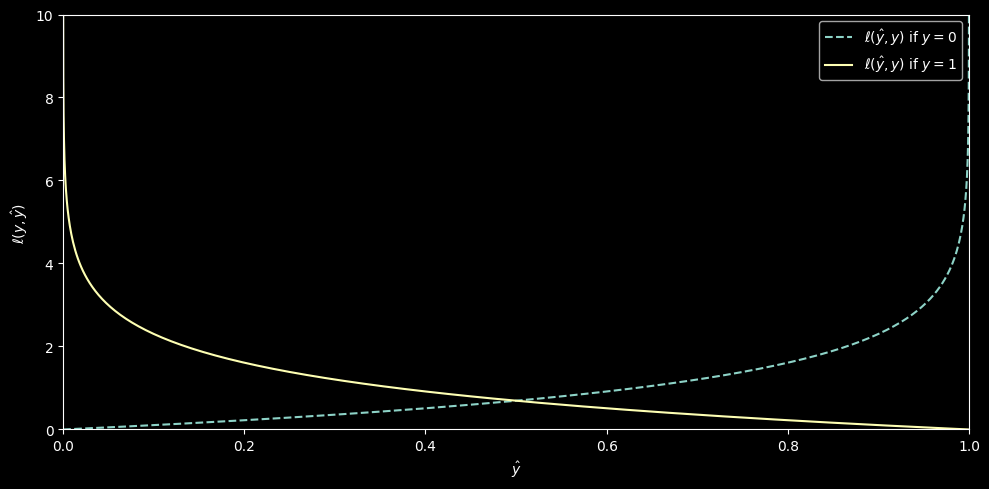

In [4]:
def sample_loss(y,y_hat):
    if y == 1:
        return -np.log(y_hat)
    else:
        return -np.log(1-y_hat)


# Let us study the behavior of the loss with respect to teh Sigmoid function.
z = np.arange(-20, 20, 0.1)
sigma_z_arr = sigmoid(z)

c0 = np.empty_like(sigma_z_arr)
c1 = np.empty_like(sigma_z_arr)
for cntr, sigma_z in enumerate(sigma_z_arr):
    c0[cntr] = sample_loss(0,sigma_z)
    c1[cntr] = sample_loss(1,sigma_z)



fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sigma_z_arr, c0, linestyle='--', label='$\ell(\hat{y},y)$ if $y=0$')
ax.plot(sigma_z_arr, c1, label='$\ell(\hat{y},y)$ if $y=1$')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 10.0)
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('$\ell(y, \hat{y})$')
ax.legend(loc="best")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
## Task 2: Behaviour of the loss 

</div>


Explain the behaviour of the sample loss based on the graph above.

## Learning the model

First, let us define the total loss (loss for all the samples) 

In [5]:
def total_loss(X,Y,w):
    m = Y.size #number of samples
    total_loss = 0
    for x_i,y_i in zip(X,Y):
        y_i_hat = sigmoid(np.dot(x_i,w))
        total_loss += sample_loss(y_i,y_i_hat)
    
    return total_loss/m

To learn the model, we need to obtain the derivative of the total loss wrt parameters of the model. This can be written as 

\begin{align}
\Delta = \frac{1}{m}\sum_{i=1}^m \big(z_i - y_i\big)\boldsymbol{x}_i\;.
\end{align}

Here, 
\begin{align}
   z_i = \sigma(\boldsymbol{w}^\top\boldsymbol{x}_i)\;.
\end{align}

In [6]:
def compute_delta(X,Y,w):
    m,n = X.shape #m = number of samples, n = dim of samples
    delta = np.zeros((n))
    for x_i,y_i in zip(X,Y):
        z_i = sigmoid(np.dot(x_i,w))
        delta += (z_i - y_i)*x_i
    
    return delta/m


Now, it seems we have everything ready for training our model. We just need to loop over according to the algorithm below.


![alt text](logistic_regression_pseudo_code.png)


We start by creating some artificial data

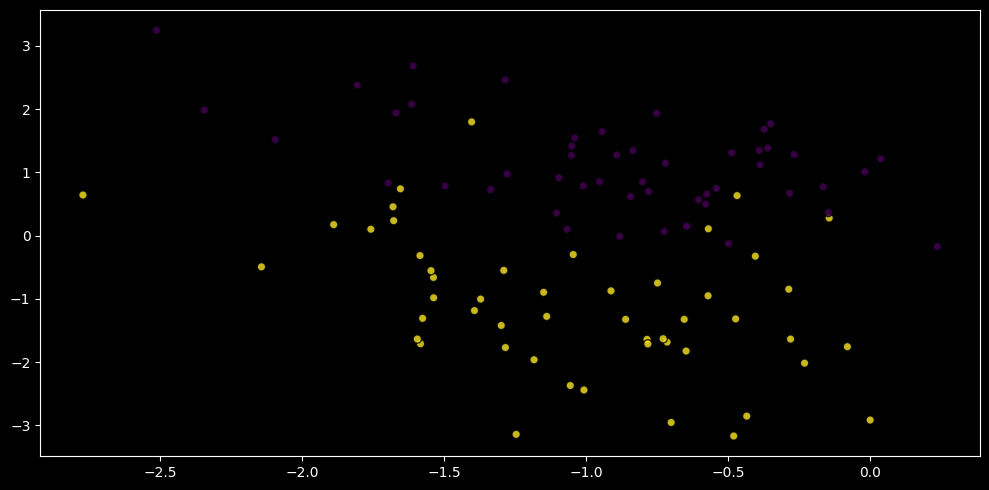

In [7]:
from sklearn.datasets import make_classification

X_trn, y_trn = make_classification(n_features=2, n_redundant=0, 
                                   n_informative=2, n_clusters_per_class=1)


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_trn[:,0], X_trn[:,1], alpha=0.8, c=y_trn, edgecolor='black')
plt.tight_layout()
plt.show()

In [8]:
m,n = X_trn.shape
max_num_iter = 100
loss_arr = np.empty((max_num_iter))
eta = 1e-2
w = np.random.randn(n)

for iter in range(max_num_iter):
    loss_arr[iter] = total_loss(X_trn,y_trn, w) 
    delta = compute_delta(X_trn,y_trn,w)
    w -= eta*delta 
    if (iter % 10 == 0): 
        print(f"iter#{iter:3}| loss = {loss_arr[iter]:6.2f}")

iter#  0| loss =   2.23
iter# 10| loss =   2.14
iter# 20| loss =   2.05
iter# 30| loss =   1.96
iter# 40| loss =   1.88
iter# 50| loss =   1.80
iter# 60| loss =   1.72
iter# 70| loss =   1.64
iter# 80| loss =   1.57
iter# 90| loss =   1.50


<div class="alert alert-block alert-info">
    
## Task 3: Prediction 

</div>

Once we learn the model, how can we use it to predict the class a query sample $\boldsymbol{x}_q$?


We use a simple thershjolding method for prediction
\begin{align*}
    \hat{y} = 
    \begin{cases}
    0 &\text{if } \sigma(\boldsymbol{W}^\top\boldsymbol{x}_q) \leq 0.5\\
    1 &\text{otherwise} \\ 
    \end{cases}
\end{align*}

<div class="alert alert-block alert-warning">

## Putting everything together
    
</div> 

Below, we will put everything nicely together in a class. We also use a function for plotting, which is located below the class.


In [9]:
# let's put everything into a class so we can use things easily

class LogisticModel:
    def __init__(self, lr=1e-2, max_num_iter=100):
        self.lr = lr
        self.max_num_iter = max_num_iter
        self.w_ = None

    @staticmethod
    def sigmoid(X):
        return 1.0 / (1.0 + np.exp(-np.clip(X, -250, 250))) #taking care of overflowing

    def total_loss(self, X, y):
        m = X.shape[0]
        Z = np.matmul(X,self.w_)
        y_hat = self.sigmoid(Z)

        loss = -np.log(y_hat[y==1]).sum() - np.log(1 - y_hat[y != 1]).sum() 
        return loss/m
    
    def compute_delta(self, X, y):
        m, n = X.shape #m = number of samples, n = dim of samples
        Z = np.matmul(X,self.w_)
        y_hat = self.sigmoid(Z)
        delta = np.matmul(X.T,(y_hat - y))

        return delta/m


        
    def predict(self, X_q):
        
        """Return prediction of a logistic model"""
        m = X_q.shape[0]
        pred = np.zeros(m)
        Z = np.matmul(X_q,self.w_)
        y_hat = self.sigmoid(Z)
        pred[y_hat >= 0.5] = 1
        return pred
    
    def fit(self, X_trn, y_trn): 
        m,n = X_trn.shape
        loss_arr = np.empty((self.max_num_iter))

        self.w_ = np.random.random(n)

        print_step = np.ceil(self.max_num_iter/10)
        for iter in range(self.max_num_iter):
            
            loss_arr[iter] = self.total_loss(X_trn,y_trn) 
            delta = self.compute_delta(X_trn,y_trn)
            self.w_ -= eta*delta 
            if (iter % print_step == 0): 
                print(f"iter#{iter:3}| loss = {loss_arr[iter]:6.2f}")
            
        return self.w_

    

    

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, wormhole_flag=False):

    resolution=0.01
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    
    X_mesh = np.array([xx1.ravel(), xx2.ravel()]).T
    
    if wormhole_flag:
        X_mesh = Phi(X_mesh)
    lab = classifier.predict(X_mesh)
    
    lab = lab.reshape(xx1.shape)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.8, 
                   c=colors[idx],
                   marker=markers[idx], 
                   label=f'Class {cl}', 
                   edgecolor='black')
    ax.legend(loc='best')

    plt.tight_layout()
    plt.show() 

This is how we use the class.

iter#  0| loss =   1.03
iter# 50| loss =   0.78
iter#100| loss =   0.63
iter#150| loss =   0.54
iter#200| loss =   0.48
iter#250| loss =   0.43
iter#300| loss =   0.41
iter#350| loss =   0.38
iter#400| loss =   0.37
iter#450| loss =   0.35


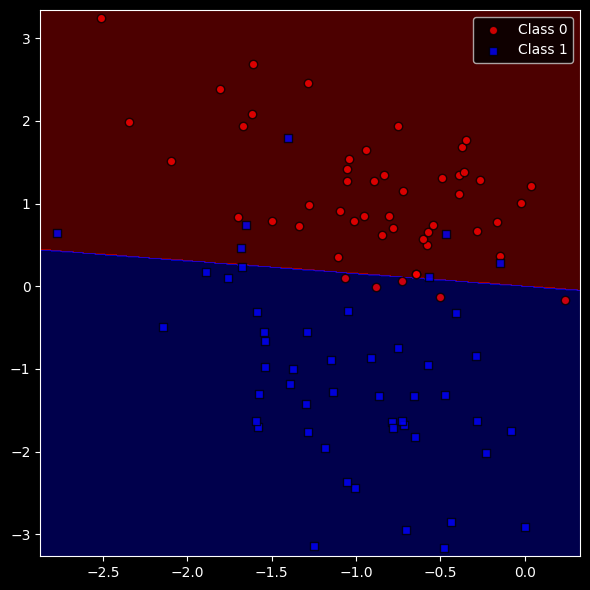

In [11]:
model_simple = LogisticModel(lr=0.05,max_num_iter=500)
model_simple.fit(X_trn, y_trn)

plot_decision_regions(X=X_trn, 
                      y=y_trn,
                      classifier=model_simple)

<div class="alert alert-block alert-info">
    
## Task 4: Explain the result 

</div>

- Explain what you observed. 
- Try to run the algorithm several times. 
- Change the learning rate and observe the results (recall $\eta \in (0,1]$)
- Change the maximum number of iterations and observe the results


<div class="alert alert-block alert-danger">
    
We are now ready to take up a more serious challenge, the two circles data!
    
</div>    

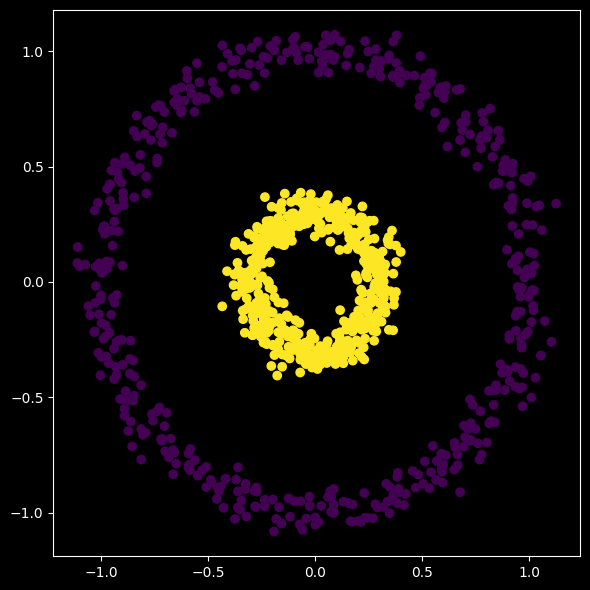

In [12]:
from sklearn.datasets import make_circles
X_circ, y_circ = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
## Task 5: Logistic Model and Two Circle Data 

</div>

- Train a new logistic model using the two circle data.  
- Discuss whether it is possible to perfectly classify the data or not


iter#  0| loss =   0.71
iter# 10| loss =   0.71
iter# 20| loss =   0.71
iter# 30| loss =   0.71
iter# 40| loss =   0.71
iter# 50| loss =   0.71
iter# 60| loss =   0.71
iter# 70| loss =   0.71
iter# 80| loss =   0.71
iter# 90| loss =   0.71


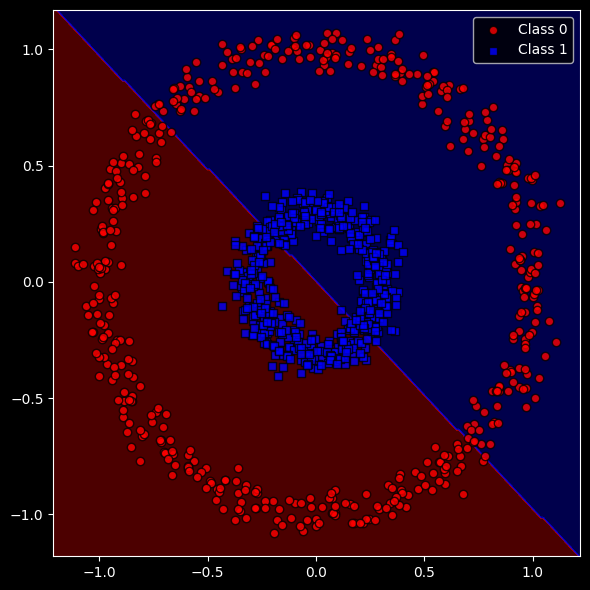

In [13]:
model_circ = LogisticModel(lr=0.05)
#model.w_ = w

model_circ.fit(X_circ,y_circ)

plot_decision_regions(X=X_circ, y=y_circ, classifier=model_circ)


<h1 align="center"> Wormhole </h1>

<img src="https://scitechdaily.com/images/Wormhole-Spacetime-Shortcut.jpg"/>



Recall in science fiction, you travel via wormholes? A similar concept in machine learning is when you map your data to higher-dimensional spaces, creating path to categorize them via linear models (eg., logistic regression). Below, we use a deterministic function in the form 

\begin{align}
\phi:
\begin{pmatrix}
x[0]\\
x[1]\\
\end{pmatrix}
\to 
\begin{pmatrix}
x[0]\\
x[1]\\
x^2[0]\\
x^2[1]\\
x[0] \times x[1]\\
1\\
\end{pmatrix}
\end{align}
to map our 2D data to 6D. If this form seems curious to you, think about the form of ellipces and their dependence on quadratic forms. Let us create this mapping and apply our logistic model to the resulting data 


In [14]:
def Phi(X):
    X_sq = X**2
    X_cross = np.expand_dims(X[:,0]*X[:,1],1)
    X_ones = np.ones_like(X_cross)
    X_aug = np.concatenate((X,X_sq,X_cross,X_ones), axis=1)
    return X_aug 



<div class="alert alert-block alert-info">

## Task 6: Logistic Model and High-Dimensional Data

</div>

Now that we have the mapping, let's apply a logistic model to our data. Ideally, we would like to see the following (figure courtesy "Machine Learning with PyTorch and Scikit-Learn" by Raschka et al.).


![alt text](wormhole_logistic.png)

iter#  0| loss =   1.05
iter#200| loss =   0.83
iter#400| loss =   0.71
iter#600| loss =   0.64
iter#800| loss =   0.60
iter#1000| loss =   0.56
iter#1200| loss =   0.52
iter#1400| loss =   0.49
iter#1600| loss =   0.47
iter#1800| loss =   0.44


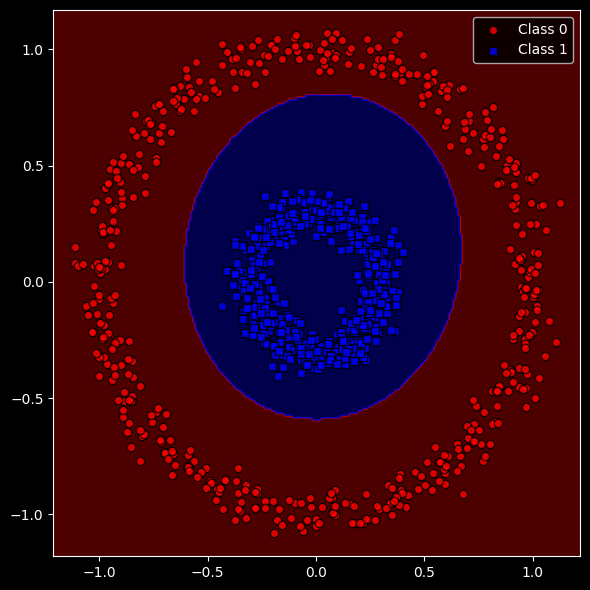

accuracy: 1.0


In [15]:
X_wh, y_wh = Phi(X_circ), y_circ
model_wh = LogisticModel(lr=0.3, max_num_iter=2000)
model_wh.fit(X_wh,y_wh)
plot_decision_regions(X=X_wh, y=y_wh, classifier=model_wh, wormhole_flag=True)




y_hat = model_wh.predict(X_wh)
acc = np.sum(y_hat == y_wh)/(y_hat.size)
print(f"accuracy: {acc:.2}")

## References
1. S. Raschka, Y. Liu, and V. Mirjalili, "Machine Learning with PyTorch and Scikit-Learn", 2022.
